# Imports

In [1]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, TFViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

# First Inference

Original image size (W, H): (2560, 1600)
After preprocessing: torch.Size([1, 3, 224, 224])
Predicted class: sports car, sport car
Confidence: 0.9763 (97.63%)


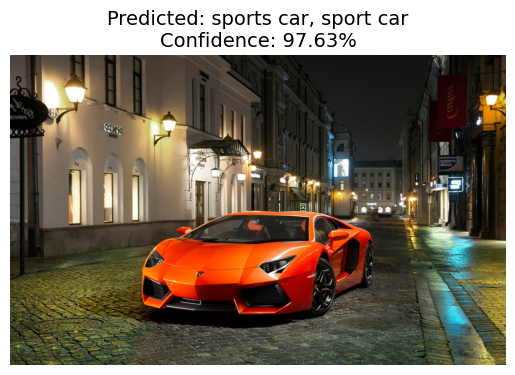

In [9]:
# from transformers import ViTImageProcessor, ViTForImageClassification
# from PIL import Image
# import torch
# import matplotlib.pyplot as plt

# # ===== 1. Load a local image =====
# image_path = "/content/car.jpg"   # 🔹 change this to your image path
# image = Image.open(image_path).convert("RGB")

# # Print original image shape
# print(f"Original image size (W, H): {image.size}")

# # ===== 2. Load the model & processor =====
# #processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
# #model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# # ===== 3. Preprocess =====
# inputs = processor(images=image, return_tensors="pt")

# # Print tensor shape after preprocessing
# # pixel_values is the actual input tensor for the model
# print(f"After preprocessing: {inputs['pixel_values'].shape}")
# # → (1, 3, 224, 224)

# # ===== 4. Run inference =====
# with torch.no_grad():
#     outputs = model(**inputs)
#     logits = outputs.logits

# # ===== 5. Decode prediction =====
# pred_idx = logits.argmax(-1).item()
# label = model.config.id2label[pred_idx]

# print(f"Predicted class: {label}")

# # ===== 6. Show image =====
# plt.imshow(image)
# plt.axis("off")
# plt.title(f"Predicted: {label}", fontsize=14)
# plt.show()


from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# ===== 1. Load a local image =====
image_path = "/content/car.jpg"   # 🔹 change this to your image path
image = Image.open(image_path).convert("RGB")

# Print original image shape
print(f"Original image size (W, H): {image.size}")

# ===== 2. Load the model & processor =====
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# ===== 3. Preprocess =====
inputs = processor(images=image, return_tensors="pt")

# Print tensor shape after preprocessing
print(f"After preprocessing: {inputs['pixel_values'].shape}")
# → (1, 3, 224, 224)

# ===== 4. Run inference =====
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

    # 🔹 Compute probabilities using softmax
    probabilities = F.softmax(logits, dim=-1)

# ===== 5. Decode prediction =====
pred_idx = logits.argmax(-1).item()
label = model.config.id2label[pred_idx]

# 🔹 Get confidence score (probability of predicted class)
confidence = probabilities[0, pred_idx].item()

print(f"Predicted class: {label}")
print(f"Confidence: {confidence:.4f} ({confidence*100:.2f}%)")

# ===== 6. Show image =====
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted: {label}\nConfidence: {confidence*100:.2f}%", fontsize=14)
plt.show()

In [ ]:
import torch.nn.functional as F

probs = F.softmax(logits, dim=-1)
predicted_class = probs.argmax(-1)
print(probs)
print(predicted_class)

In [19]:
print(model.named_modules)

<bound method Module.named_modules of ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=

# Inspecting model layers

In [5]:
print(model)


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [6]:
# Patch embedding and encoder
print(model.vit.embeddings)
print("-----------------------------------------------------")
print(model.vit.encoder)
print("-----------------------------------------------------")
# Transformer block 0
print(model.vit.encoder.layer[0])
print("-----------------------------------------------------")
# Classification head
print(model.classifier)
print("-----------------------------------------------------")

ViTEmbeddings(
  (patch_embeddings): ViTPatchEmbeddings(
    (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (dropout): Dropout(p=0.0, inplace=False)
)
-----------------------------------------------------
ViTEncoder(
  (layer): ModuleList(
    (0-11): 12 x ViTLayer(
      (attention): ViTAttention(
        (attention): ViTSelfAttention(
          (query): Linear(in_features=768, out_features=768, bias=True)
          (key): Linear(in_features=768, out_features=768, bias=True)
          (value): Linear(in_features=768, out_features=768, bias=True)
        )
        (output): ViTSelfOutput(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
      (intermediate): ViTIntermediate(
        (dense): Linear(in_features=768, out_features=3072, bias=True)
        (intermediate_act_fn): GELUActivation()
      )
      (output): ViTOutput(
        (dense): Linear(in_features=3072, o

# Trying the Attack

Original image size (W, H): (2560, 1600)

===== ORIGINAL IMAGE =====
Predicted class: sports car, sport car
Confidence: 0.9763 (97.63%)

===== RUNNING DUAL ATTACK =====
Iterations: 50, Epsilon: 0.2000, Patches per iter: 130/196
Iteration 2/50 - Loss: 0.2672
Iteration 4/50 - Loss: 0.2256
Iteration 6/50 - Loss: 0.3472
Iteration 8/50 - Loss: 0.2608
Iteration 10/50 - Loss: 0.2247
Iteration 12/50 - Loss: 0.2158
Iteration 14/50 - Loss: 0.1527
Iteration 16/50 - Loss: 0.2543
Iteration 18/50 - Loss: 0.3905
Iteration 20/50 - Loss: 0.4773
Iteration 22/50 - Loss: 0.1175
Iteration 24/50 - Loss: 0.1500
Iteration 26/50 - Loss: 0.1526
Iteration 28/50 - Loss: 0.1142
Iteration 30/50 - Loss: 0.0570
Iteration 32/50 - Loss: 0.1841
Iteration 34/50 - Loss: 0.0850
Iteration 36/50 - Loss: 0.2026
Iteration 38/50 - Loss: 0.1233
Iteration 40/50 - Loss: 0.0670
Iteration 42/50 - Loss: 0.2196
Iteration 44/50 - Loss: 0.1261
Iteration 46/50 - Loss: 0.1267
Iteration 48/50 - Loss: 0.2166
Iteration 50/50 - Loss: 0.1812



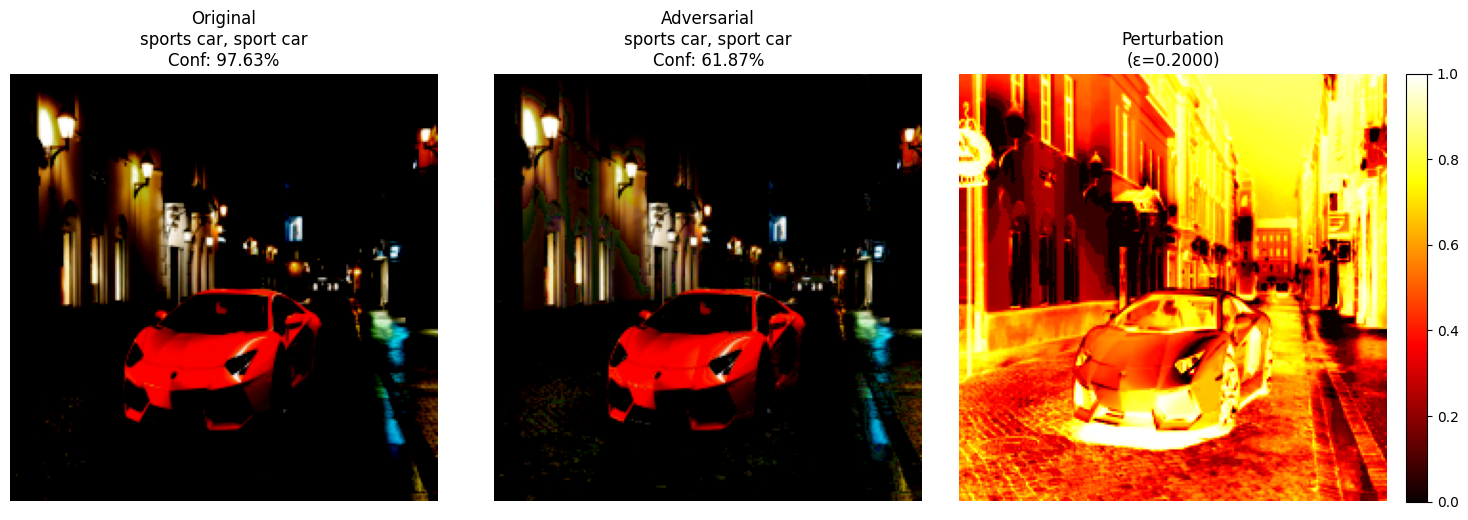


===== PERTURBATION STATS =====
L∞ norm: 1.000000
L2 norm: 226.315994


In [18]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Load image and model =====
image_path = "/content/car.jpg"
image = Image.open(image_path).convert("RGB")

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
model.eval()

print(f"Original image size (W, H): {image.size}")

# ===== 2. Get original prediction =====
inputs = processor(images=image, return_tensors="pt")
original_input = inputs['pixel_values'].clone()

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=-1)
    pred_idx = logits.argmax(-1).item()
    original_label = model.config.id2label[pred_idx]
    original_confidence = probabilities[0, pred_idx].item()

print(f"\n===== ORIGINAL IMAGE =====")
print(f"Predicted class: {original_label}")
print(f"Confidence: {original_confidence:.4f} ({original_confidence*100:.2f}%)")

# ===== 3. Dual Attack Implementation =====

# Hyperparameters from paper
epsilon = 0.2  # L_inf bound (16 for pixel values 0-255, normalized)
num_iterations = 50
alpha = epsilon / num_iterations
T = 130  # number of patches to use per iteration
lambda_l2 = 0.1
N = 196  # total number of patches (14x14 for 224x224 image with patch size 16)

# Get true label for untargeted attack
true_label = pred_idx

# Initialize perturbation
delta = torch.zeros_like(original_input, requires_grad=True)

print(f"\n===== RUNNING DUAL ATTACK =====")
print(f"Iterations: {num_iterations}, Epsilon: {epsilon:.4f}, Patches per iter: {T}/{N}")

# Hook to bypass attention gradients (PNA)
def pna_hook(module, grad_input, grad_output):
    # Skip gradients through attention
    # Return None for the attention weights gradient
    return tuple(None if i == 0 else g for i, g in enumerate(grad_input))

# Register hooks on attention layers
hooks = []
for name, module in model.named_modules():
    if 'attention' in name.lower() and hasattr(module, 'attention'):
        hook = module.register_backward_hook(pna_hook)
        hooks.append(hook)

for iteration in range(num_iterations):
    # Enable gradient computation
    delta.requires_grad = True

    # PatchOut: Create random patch mask
    # Reshape to patch space: (1, 3, 224, 224) -> patches
    patch_size = 16
    img_size = 224
    patches_per_side = img_size // patch_size  # 14

    # Randomly select T patches
    selected_patches = torch.randperm(N)[:T]

    # Create mask
    mask = torch.zeros(1, 3, img_size, img_size)
    for patch_idx in selected_patches:
        row = patch_idx // patches_per_side
        col = patch_idx % patches_per_side
        mask[:, :, row*patch_size:(row+1)*patch_size, col*patch_size:(col+1)*patch_size] = 1.0

    # Apply mask to perturbation
    masked_delta = mask * delta

    # Create adversarial input
    adv_input = original_input + masked_delta

    # Forward pass
    outputs = model(pixel_values=adv_input)
    logits = outputs.logits

    # Loss: Cross-entropy + L2 regularization
    loss = F.cross_entropy(logits, torch.tensor([true_label]))
    l2_norm = torch.norm(delta, p=2)
    total_loss = -loss + lambda_l2 * l2_norm  # Negative because we want to maximize loss

    # Backward pass
    total_loss.backward()

    # Get gradient
    grad = delta.grad.detach()

    # Update perturbation using sign of gradient
    delta_update = alpha * grad.sign()
    delta = delta.detach() + delta_update

    # Project to epsilon ball
    delta = torch.clamp(delta, -epsilon, epsilon)

    # Ensure valid pixel range [0, 1] after adding to original
    delta = torch.clamp(original_input + delta, 0, 1) - original_input
    delta = delta.detach()

    if (iteration + 1) % 2 == 0:
        print(f"Iteration {iteration + 1}/{num_iterations} - Loss: {loss.item():.4f}")

# Remove hooks
for hook in hooks:
    hook.remove()

# ===== 4. Generate final adversarial example =====
adversarial_input = original_input + delta

# ===== 5. Get adversarial prediction =====
with torch.no_grad():
    adv_outputs = model(pixel_values=adversarial_input)
    adv_logits = adv_outputs.logits
    adv_probabilities = F.softmax(adv_logits, dim=-1)
    adv_pred_idx = adv_logits.argmax(-1).item()
    adv_label = model.config.id2label[adv_pred_idx]
    adv_confidence = adv_probabilities[0, adv_pred_idx].item()

print(f"\n===== ADVERSARIAL IMAGE =====")
print(f"Predicted class: {adv_label}")
print(f"Confidence: {adv_confidence:.4f} ({adv_confidence*100:.2f}%)")
print(f"Attack successful: {adv_pred_idx != true_label}")

# ===== 6. Visualization =====
def tensor_to_image(tensor):
    # Convert from (1, 3, 224, 224) to (224, 224, 3)
    img = tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img = np.clip(img, 0, 1)
    return img

# Compute perturbation magnitude
perturbation = delta.squeeze(0).permute(1, 2, 0).cpu().numpy()
perturbation_vis = np.abs(perturbation).mean(axis=2)  # Average across channels

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(tensor_to_image(original_input))
axes[0].set_title(f"Original\n{original_label}\nConf: {original_confidence*100:.2f}%", fontsize=12)
axes[0].axis('off')

# Adversarial image
axes[1].imshow(tensor_to_image(adversarial_input))
axes[1].set_title(f"Adversarial\n{adv_label}\nConf: {adv_confidence*100:.2f}%", fontsize=12)
axes[1].axis('off')

# Perturbation visualization
im = axes[2].imshow(perturbation_vis, cmap='hot')
axes[2].set_title(f"Perturbation\n(ε={epsilon:.4f})", fontsize=12)
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Print perturbation statistics
print(f"\n===== PERTURBATION STATS =====")
print(f"L∞ norm: {delta.abs().max().item():.6f}")
print(f"L2 norm: {torch.norm(delta, p=2).item():.6f}")